Matplotlib is building the font cache; this may take a moment.


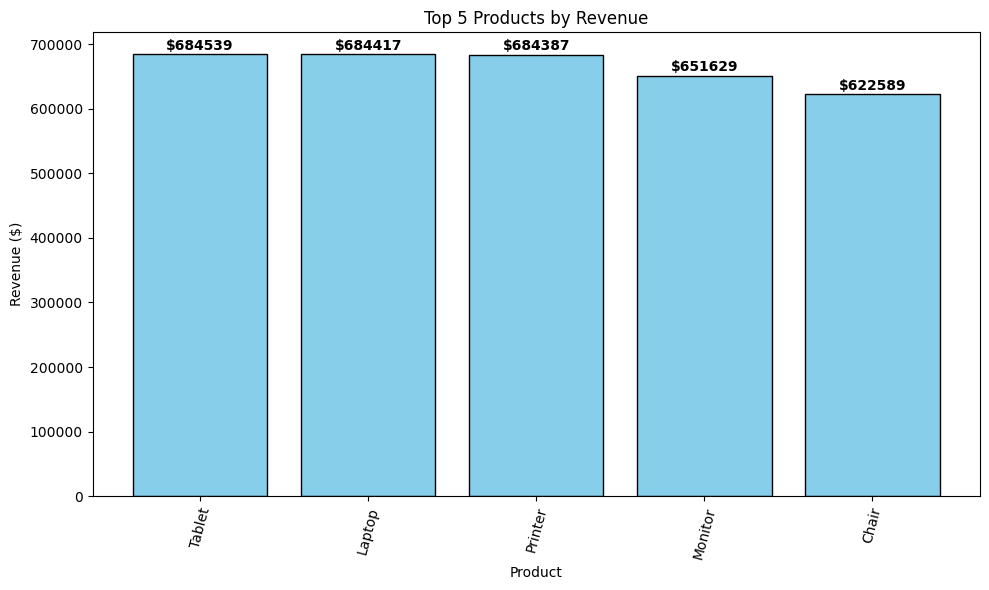

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV into Pandas
csv_path = "sales_data.csv"
df_csv = pd.read_csv(csv_path)

# Create a fresh in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Load CSV data into SQLite
df_csv.to_sql("sales", conn, if_exists="replace", index=False)

# Run SQL query (total quantity and revenue per product)
query = """
SELECT 
    Product AS product, 
    SUM(Quantity) AS total_qty,
    SUM(TotalPrice) AS revenue
FROM sales
GROUP BY Product
ORDER BY revenue DESC
LIMIT 5
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Plot bar chart (Revenue by Product)
plt.figure(figsize=(10,6))
plt.bar(df['product'], df['revenue'], color='skyblue', edgecolor='black')

# Add labels
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.title("Top 5 Products by Revenue")

# Show values on top of bars
for i, v in enumerate(df['revenue']):
    plt.text(i, v + (0.01 * v), f"${v:.0f}", ha='center', fontweight='bold')

plt.xticks(rotation=75)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
